In [56]:
#Lê Đào Duy Tân - 52100104
#Đống Thạc Nhân 52100914
#Dương Thanh Qúy -  52000591

In [57]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from scipy.stats import expon
from scipy.stats import norm
from scipy import stats


In [58]:
#Read data
data = pd.read_csv("D:/DOWNLOAD/new.csv", encoding='gbk', low_memory=False)

In [59]:
data.describe()


,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [60]:
data.head()


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [62]:
data.isnull().sum()


url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

In [63]:
#DOM has missing 157977/318850 so drop this colum

In [64]:
data.drop('DOM',axis=1,inplace=True)

In [65]:
# Lọc các cột có kiểu dữ liệu là object (string)
object_columns = data.select_dtypes(include=['O']).columns

# Duyệt qua từng cột và in giá trị duy nhất
for column in object_columns:
    print("{}: {}\n".format(column, data[column].unique()))


url: ['https://bj.lianjia.com/chengjiao/101084782030.html'
 'https://bj.lianjia.com/chengjiao/101086012217.html'
 'https://bj.lianjia.com/chengjiao/101086041636.html' ...
 'https://bj.lianjia.com/chengjiao/BJYZ92324217.html'
 'https://bj.lianjia.com/chengjiao/BJYZ92333313.html'
 'https://bj.lianjia.com/chengjiao/BJYZ92363553.html']

id: ['101084782030' '101086012217' '101086041636' ... 'BJYZ92324217'
 'BJYZ92333313' 'BJYZ92363553']

tradeTime: ['2016-08-09' '2016-07-28' '2016-12-11' ... '2012-01-28' '2011-01-30'
 '2009-01-11']

livingRoom: ['2' '3' '1' '4' '5' '6' '9' '0' '7' '8' '#NAME?']

drawingRoom: ['1' '2' '0' '4' '3' '5' '中 14' '中 15' '中 16' '中 6' '高 14' '顶 6' '低 6'
 '低 16' '高 12' '低 15' '高 6' '底 28' '底 11' '中 24' '底 20' '中 22']

bathRoom: ['1' '2' '3' '0' '4' '5' '6' '7' '2006' '2003' '1990' '2000' '1996' '2005'
 '2011' '未知' '1994' '2004']

floor: ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中

In [66]:
#Transform data

In [67]:
#Drop value "unknown" in constructionTime
data = data[data['constructionTime']!='未知']


In [68]:
# Calculate age of house
data['constructionTime'] = data['constructionTime'].astype(int)
data['year_House'] = datetime.datetime.now().year - data['constructionTime']


In [69]:
#Get year in tradeTime
data['tradeTime'] = pd.to_datetime(data['tradeTime']).dt.year


In [70]:

# Sử dụng list comprehension thay thế vòng lặp
lst_numeric = [value.split()[1] if len(value.split()) > 1 else np.nan for value in data['floor'].values]
lst_str = [value.split()[0] if len(value.split()) > 0 else np.nan for value in data['floor'].values]
translation_dict = {'中': 'middle', '高': 'high', '底': 'bottom', '低': 'low', '未知': 'unknown', '顶': 'top'}
# Sử dụng list comprehension và từ điển để thay thế
lst_str_eng = [translation_dict.get(string, string) for string in lst_str]
#
dt1 = pd.DataFrame(lst_str_eng,columns=['floorType'])
dt2 = pd.DataFrame(lst_numeric,columns=['floorHeight'])
data = pd.concat([data,dt1,dt2],axis=1)

# Deleting unknown values
data = data[data['floorType']!='unknown']
data.dropna(inplace=True)

In [71]:
# Tạo từ điển ánh xạ giữa giá trị cũ và giá trị mới
building_type_mapping = {1: 'Tower', 2: 'Bungalow', 3: 'Tower and Plate', 4: 'Plate'}

# Sử dụng replace và từ điển để thay thế giá trị
data['buildingType'].replace(building_type_mapping, inplace=True)


In [72]:
# Danh sách các cột cần chuyển đổi
columns_to_convert = ['floorHeight', 'livingRoom', 'district', 'tradeTime', 'year_House',
                       'renovationCondition', 'buildingStructure', 'elevator',
                       'fiveYearsProperty', 'subway', 'followers']

# Tự động chuyển đổi kiểu dữ liệu cho từng cột
for column in columns_to_convert:
    data[column] = data[column].astype(int)

# Đặt lại index và loại bỏ cột 'index'
data.reset_index(drop=True, inplace=True)

In [73]:
data.info()
data.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279136 entries, 0 to 279135
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  279136 non-null  object 
 1   id                   279136 non-null  object 
 2   Lng                  279136 non-null  float64
 3   Lat                  279136 non-null  float64
 4   Cid                  279136 non-null  float64
 5   tradeTime            279136 non-null  int32  
 6   followers            279136 non-null  int32  
 7   totalPrice           279136 non-null  float64
 8   price                279136 non-null  float64
 9   square               279136 non-null  float64
 10  livingRoom           279136 non-null  int32  
 11  drawingRoom          279136 non-null  object 
 12  kitchen              279136 non-null  float64
 13  bathRoom             279136 non-null  object 
 14  floor                279136 non-null  object 
 15  buildingType     

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeTime              0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
year_House             0
floorType              0
floorHeight            0
dtype: int64

In [74]:
#EDA

In [75]:
data.to_csv("data.csv", index=False)


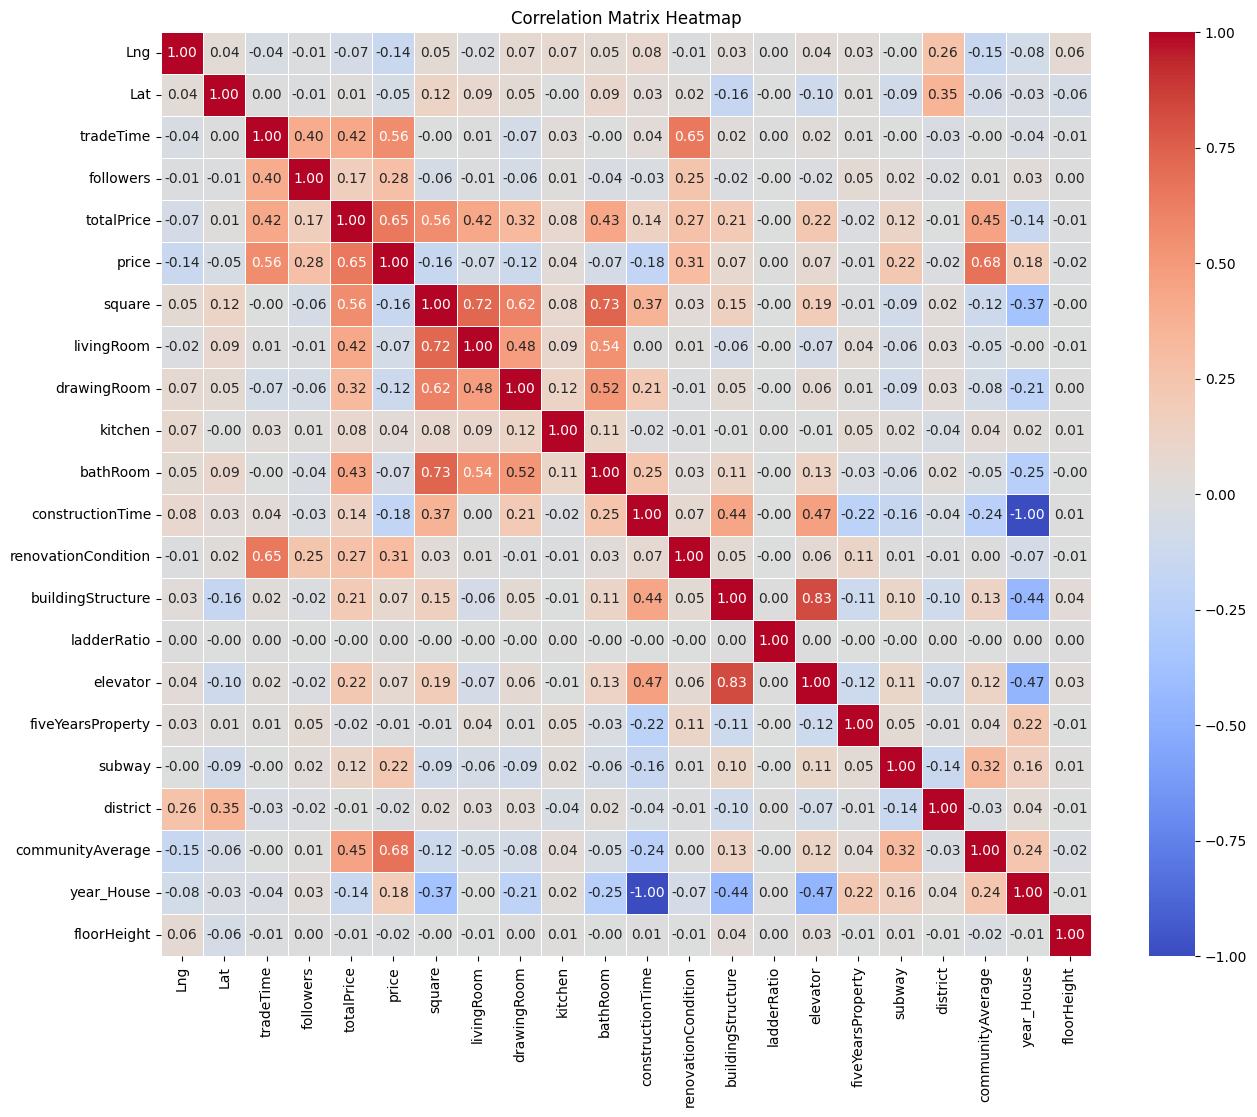

In [76]:
# Chọn subset của DataFrame chứa các cột cần vẽ heatmap
subset_df = data[[ 'Lng', 'Lat',  'tradeTime', 'followers', 'totalPrice',
                'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime', 'renovationCondition',
                'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
                'subway', 'district', 'communityAverage', 'year_House',
                'floorHeight']]

# Tạo ma trận correlation
correlation_matrix = subset_df.corr()

# Thiết lập kích thước hình vẽ
plt.figure(figsize=(15, 12))

# Vẽ heatmap và hiển thị giá trị trên từng ô
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Đặt tiêu đề cho biểu đồ
plt.title("Correlation Matrix Heatmap")

# Hiển thị biểu đồ
plt.show()


In [77]:
#Chọn các cột có mối quan hệ cao là tradeTime, followers, renovationCondition, communityAverage

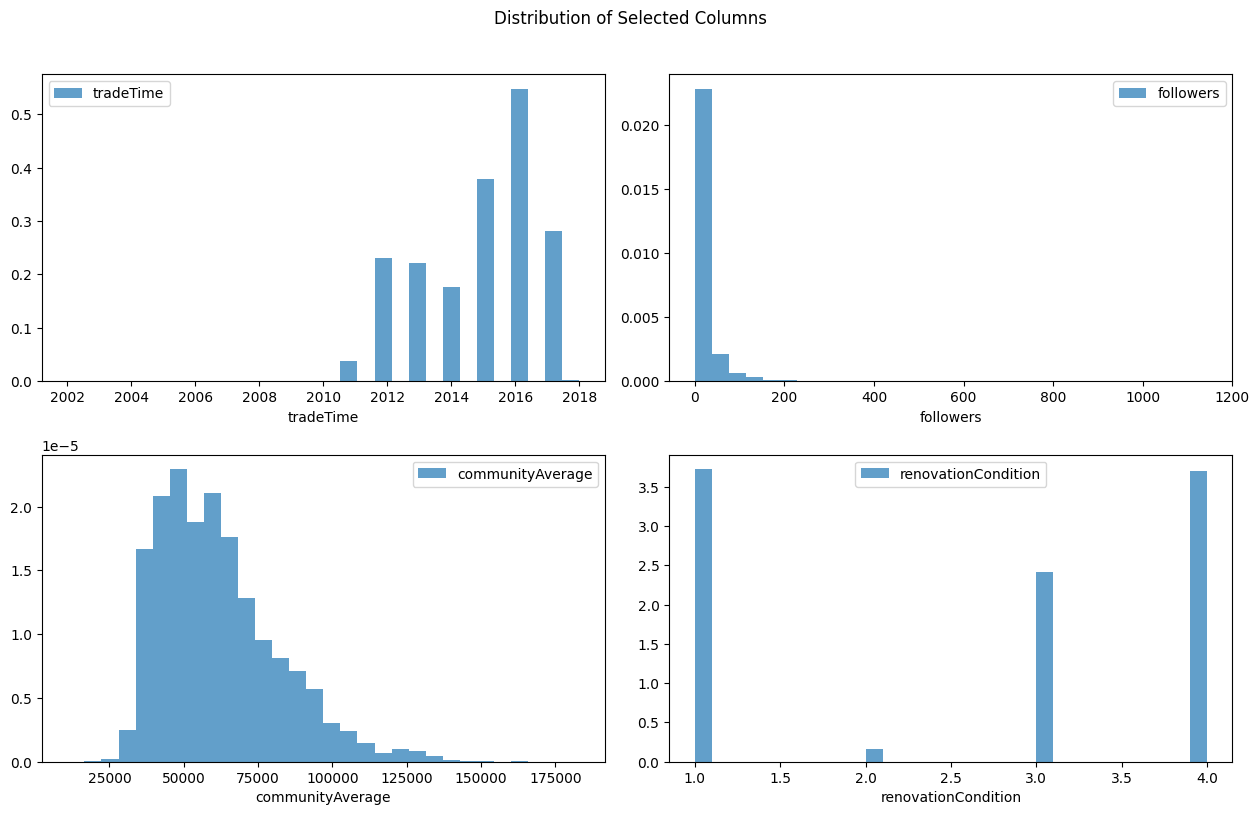

In [78]:
#Vẽ histogram
selected_columns = ['tradeTime', 'followers', 'communityAverage', 'renovationCondition']
selected_data = data[selected_columns]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12.7, 8.27))
fig.suptitle('Distribution of Selected Columns')

for i, col in enumerate(selected_columns):
    axes[i // 2, i % 2].hist(selected_data[col], bins=30, density=True, alpha=0.7, label=col)
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [79]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
z_scores = pd.DataFrame()

for column in numerical_columns:
    z_scores[column] = stats.zscore(data[column])

z_score_threshold = 3

outliers = (z_scores.abs() > z_score_threshold)

outliers_rows = data[outliers.any(axis=1)]
print(outliers_rows)

                                                      url            id  \
2       https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
4       https://bj.lianjia.com/chengjiao/101086920653....  101086920653   
9       https://bj.lianjia.com/chengjiao/101087508625....  101087508625   
11      https://bj.lianjia.com/chengjiao/101087812155....  101087812155   
18      https://bj.lianjia.com/chengjiao/101088145348....  101088145348   
...                                                   ...           ...   
279102  https://bj.lianjia.com/chengjiao/BJXC85479880....  BJXC85479880   
279110  https://bj.lianjia.com/chengjiao/BJXC85482289....  BJXC85482289   
279114  https://bj.lianjia.com/chengjiao/BJXC85484304....  BJXC85484304   
279117  https://bj.lianjia.com/chengjiao/BJXC85484871....  BJXC85484871   
279121  https://bj.lianjia.com/chengjiao/BJXC85486368....  BJXC85486368   

               Lng        Lat           Cid  tradeTime  followers  totalPrice  \
2       116.561978

In [80]:
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR)))

outliers_iqr_rows = data[outliers_iqr.any(axis=1)]
print(outliers_iqr_rows)

                                                      url            id  \
2       https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
3       https://bj.lianjia.com/chengjiao/101086406841....  101086406841   
4       https://bj.lianjia.com/chengjiao/101086920653....  101086920653   
7       https://bj.lianjia.com/chengjiao/101087303800....  101087303800   
9       https://bj.lianjia.com/chengjiao/101087508625....  101087508625   
...                                                   ...           ...   
279121  https://bj.lianjia.com/chengjiao/BJXC85486368....  BJXC85486368   
279124  https://bj.lianjia.com/chengjiao/BJXC85486892....  BJXC85486892   
279125  https://bj.lianjia.com/chengjiao/BJXC85487332....  BJXC85487332   
279130  https://bj.lianjia.com/chengjiao/BJXC85488405....  BJXC85488405   
279133  https://bj.lianjia.com/chengjiao/BJXC85489545....  BJXC85489545   

               Lng        Lat           Cid  tradeTime  followers  totalPrice  \
2       116.561978

In [81]:
data.drop(data[outliers.any(axis=1)].index, inplace=True)
data.drop(data[outliers_iqr.any(axis=1)].index, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3352\4218458866.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[outliers_iqr.any(axis=1)].index, inplace=True)


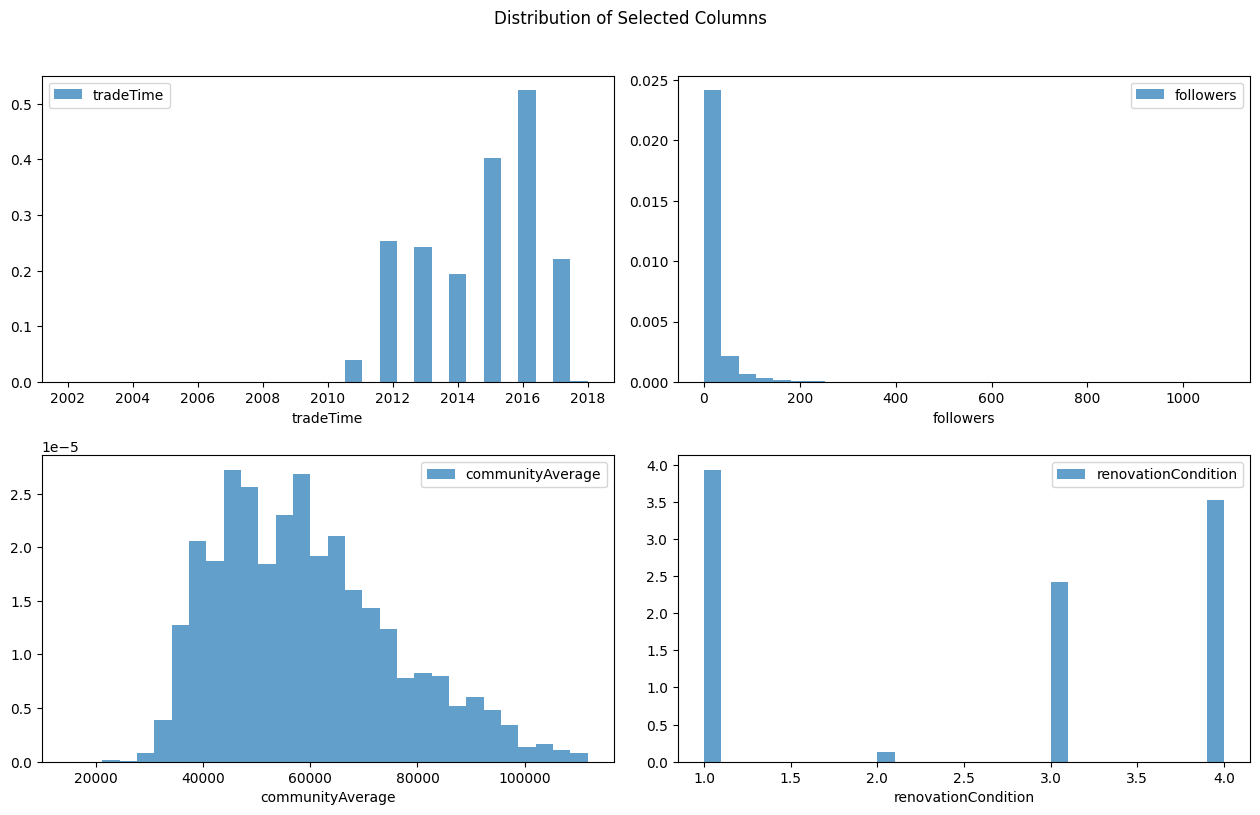

In [82]:
#Vẽ histogram
selected_columns = ['tradeTime', 'followers', 'communityAverage', 'renovationCondition']
selected_data = data[selected_columns]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12.7, 8.27))
fig.suptitle('Distribution of Selected Columns')

for i, col in enumerate(selected_columns):
    axes[i // 2, i % 2].hist(selected_data[col], bins=30, density=True, alpha=0.7, label=col)
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

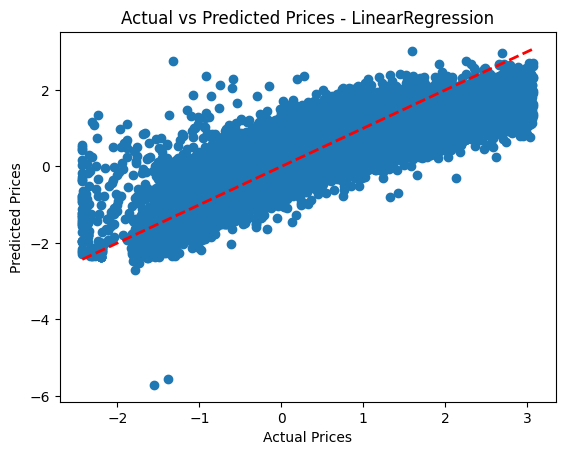

LinearRegression:
Mean Squared Error: 0.25646061968111444
R-squared: 0.7430089902554226
Mean Absolute Error: 0.393495325633988




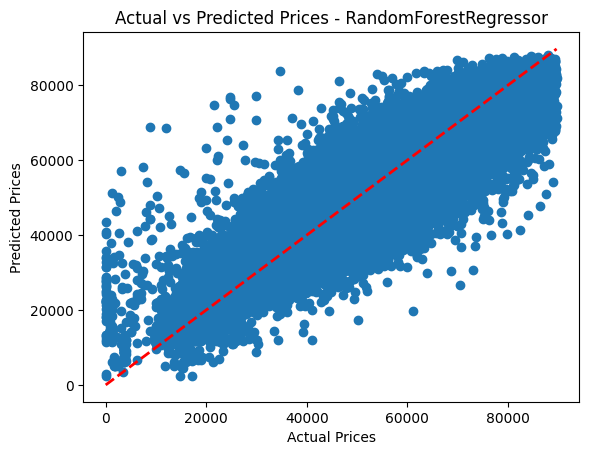

RandomForestRegressor:
Mean Squared Error: 42399622.55428553
R-squared: 0.8399288902914711
Mean Absolute Error: 4548.852479220516




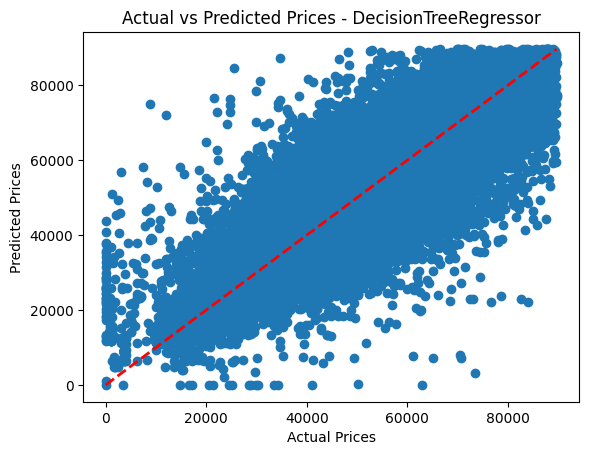

DecisionTreeRegressor:
Mean Squared Error: 62528359.376874864
R-squared: 0.7639369581440201
Mean Absolute Error: 5397.726789571711




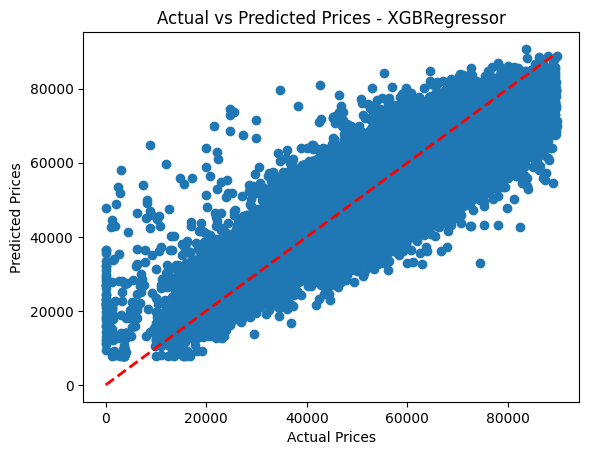

XGBRegressor:
Mean Squared Error: 39793118.560711
R-squared: 0.8497692134258811
Mean Absolute Error: 4511.3335728227285




In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate on validation set
    y_val_pred = model.predict(X_val)

    # Scatter plot
    plt.scatter(y_val, y_val_pred)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Actual vs Predicted Prices - {type(model).__name__}")
    plt.show()

    # Model evaluation
    mse = mean_squared_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)

    print(f"{type(model).__name__}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Error: {mae}")
    print("\n")

# Select features
selected_columns = ['tradeTime', 'followers', 'communityAverage', 'renovationCondition', 'price']
selected_data = data[selected_columns]

# Split the data
X = selected_data.drop('price', axis=1)
y = data['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert target variable to 1D array
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

# Standardize the target variable
y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.transform(y_val)

# Linear Regression
reg_model = LinearRegression()
train_and_evaluate_model(reg_model, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled)

# Random Forest
rf_model = RandomForestRegressor()
train_and_evaluate_model(rf_model, X_train_scaled, y_train.ravel(), X_val_scaled, y_val.ravel())

# Decision Tree
dt_model = DecisionTreeRegressor()
train_and_evaluate_model(dt_model, X_train_scaled, y_train.ravel(), X_val_scaled, y_val.ravel())

# XGBoost
xgb_model = XGBRegressor()
train_and_evaluate_model(xgb_model, X_train_scaled, y_train.ravel(), X_val_scaled, y_val.ravel())


In [84]:
# Mean Squared Error (MSE): MSE là một độ đo đánh giá chất lượng của mô hình dựa trên sự chênh lệch giữa giá trị dự đoán và giá trị thực tế. Giá trị MSE càng thấp, mô hình càng tốt. Trong trường hợp này, MSE là 68071757.81, có thể được hiểu là sự chênh lệch trung bình bình phương giữa giá trị dự đoán và giá trị thực tế.

# R-squared (R²): R-squared là một độ đo khác để đánh giá chất lượng của mô hình. Nó thể hiện tỷ lệ phần trăm sự biến thiên của biến phụ thuộc được giải thích bởi mô hình. Giá trị R² càng gần 1, mô hình càng tốt. Trong trường hợp này, R² là 0.743, nghĩa là mô hình giải thích được khoảng 74.3% sự biến thiên của biến mục tiêu.

# Mean Absolute Error (MAE): MAE là sự chênh lệch trung bình giữa giá trị dự đoán và giá trị thực tế. Giá trị MAE càng thấp, mô hình càng chính xác. Trong trường hợp này, MAE là 6410.81.

# Tóm lại, mô hình của  có vẻ có khả năng dự đoán tốt trên tập kiểm tra, nhưng vẫn có thể có sự chênh lệch đôi chút giữa giá trị dự đoán và giá trị thực tế.

In [85]:
#FEEDFORWARD NEURAL NETWORK

In [86]:
selected_columns = ['tradeTime', 'followers', 'communityAverage', 'renovationCondition', 'price']
selected_data = data[selected_columns]
selected_data.head(5)

,tradeTime,followers,communityAverage,renovationCondition,price
0,2016,106,56021.0,3,31680.0
1,2016,126,71539.0,4,43436.0
5,2016,57,67738.0,3,52000.0
6,2016,167,50112.0,4,37672.0
8,2016,218,44235.0,1,27917.0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = selected_data.drop('price', axis = 1)
y= data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
#import thu vien
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
#Tao mo hinh neural tuan tu trong keras
model = Sequential()
#Tao hidden layer 256 nodes, ham activate Rectified Linear Unit
model.add(Dense(256,input_dim=X_train_scaled.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
#su dung linear vi regression problem
model.add(Dense(1, activation='linear'))

In [90]:
#compile va train
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)
#evaluate
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

predictions = model.predict(X_test_scaled)

Epoch 1/10
4490/4490 [==============================] - 20s 4ms/step - loss: 127551416.0000 - mae: 7270.3896 - val_loss: 50760728.0000 - val_mae: 5314.7896
Epoch 2/10
4490/4490 [==============================] - 20s 4ms/step - loss: 53878248.0000 - mae: 5496.2510 - val_loss: 47293588.0000 - val_mae: 5103.7930
Epoch 3/10
4490/4490 [==============================] - 29s 6ms/step - loss: 51024012.0000 - mae: 5287.5854 - val_loss: 44312868.0000 - val_mae: 4835.5859
Epoch 4/10
4490/4490 [==============================] - 27s 6ms/step - loss: 49570432.0000 - mae: 5172.0786 - val_loss: 43399968.0000 - val_mae: 4779.6621
Epoch 5/10
4490/4490 [==============================] - 30s 7ms/step - loss: 48815140.0000 - mae: 5122.7241 - val_loss: 43083104.0000 - val_mae: 4744.8198
Epoch 6/10
4490/4490 [==============================] - 21s 5ms/step - loss: 48840324.0000 - mae: 5110.9829 - val_loss: 42995080.0000 - val_mae: 4714.7705
Epoch 7/10
4490/4490 [==============================] - 20s 5ms/step 

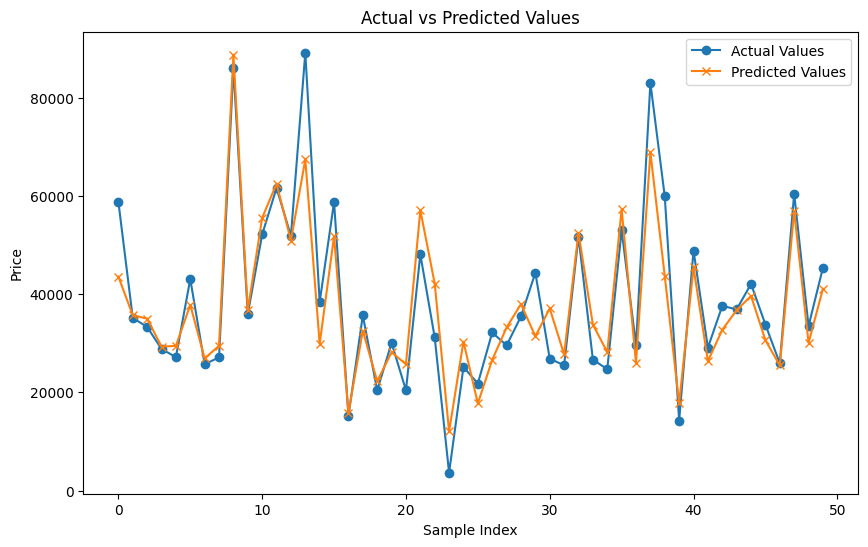

In [91]:
#so sanh ket qua
import matplotlib.pyplot as plt
num_samples_to_plot = 50

plt.figure(figsize=(10, 6))
plt.plot(range(num_samples_to_plot), y_test[:num_samples_to_plot], label='Actual Values', marker='o')
plt.plot(range(num_samples_to_plot), predictions[:num_samples_to_plot], label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [92]:
#recurrent neural network

In [93]:
#import thu vien
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
#load data
selected_columns = ['tradeTime', 'followers', 'communityAverage', 'renovationCondition', 'price']
df = data[selected_columns]

#scale df
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# chon do dai sequence (number of time steps to consider for prediction)
sequence_length = 10

# Tao sequence
sequences = []
target = []
for i in range(len(df_scaled) - sequence_length):
  sequences.append(df_scaled.iloc[i:i + sequence_length].values)
  target.append(df_scaled['price'].iloc[i + sequence_length])

# chuyen thanh numpy arrays
X = np.array(sequences)
print(X.shape)
y = np.array(target).reshape(-1, 1)

# tach du lieu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(224466, 10, 5)


In [95]:
# xai lstm (Long Short-Term Memory) model (rnn)
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(10, 5)))
model.add(Dense(units=1))

In [96]:
# Compile
model.compile(optimizer='adam', loss='mse', metrics='mae')
#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Train
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/5
2806/2806 [==============================] - 34s 12ms/step - loss: 0.0179 - mae: 0.0988 - val_loss: 0.0149 - val_mae: 0.0909
Epoch 2/5
2806/2806 [==============================] - 31s 11ms/step - loss: 0.0148 - mae: 0.0911 - val_loss: 0.0146 - val_mae: 0.0897
Epoch 3/5
2806/2806 [==============================] - 30s 11ms/step - loss: 0.0146 - mae: 0.0904 - val_loss: 0.0146 - val_mae: 0.0913
Epoch 4/5
2806/2806 [==============================] - 30s 11ms/step - loss: 0.0146 - mae: 0.0901 - val_loss: 0.0145 - val_mae: 0.0903
Epoch 5/5
2806/2806 [==============================] - 31s 11ms/step - loss: 0.0145 - mae: 0.0899 - val_loss: 0.0144 - val_mae: 0.0891


In [97]:
# Evaluate
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test data: {loss}')
# predict
predictions = model.predict(X_test)

   1/1403 [..............................] - ETA: 51s - loss: 0.0088 - mae: 0.0708

1403/1403 [==============================] - 6s 4ms/step - loss: 0.0144 - mae: 0.0891
Mean Squared Error on test data: [0.014442546293139458, 0.08907698094844818]
1403/1403 [==============================] - 6s 4ms/step


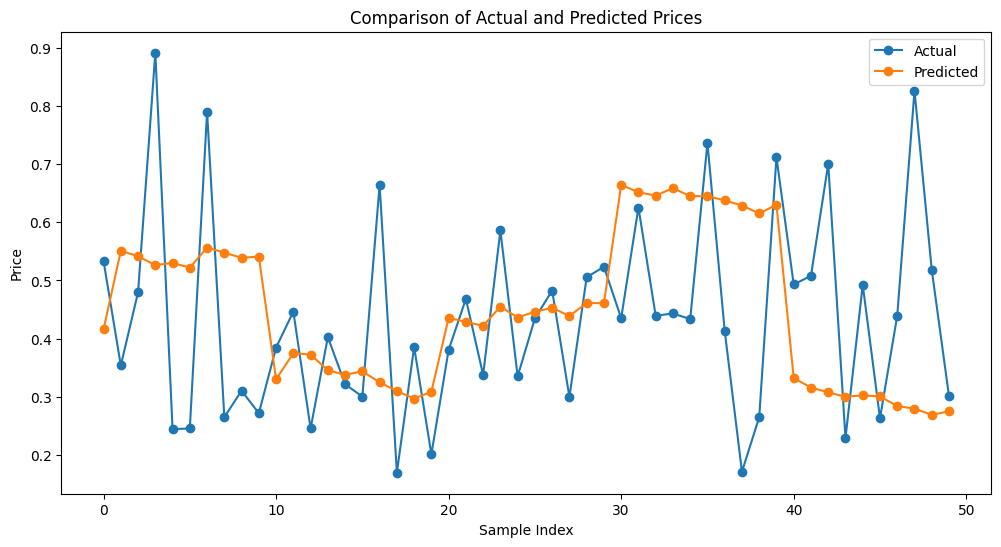

In [98]:
#so sanh
y_test = y_test.flatten()
predictions = predictions.flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_test[:50], label='Actual', marker='o')
plt.plot(predictions[:50], label='Predicted', marker='o')
plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load và chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize mô hình Random Forest với regularization
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Điều chỉnh các tham số tùy theo dữ liệu

# Áp dụng Cross-validation và Regularization
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')  # Sử dụng R-squared làm metric

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
rf_model.fit(X_train_scaled, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
test_score = rf_model.score(X_test_scaled, y_test)

# In kết quả
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Test Set Score: {test_score}")

Cross-Validation Scores: [0.85343121 0.85706701 0.85773243 0.85354628 0.85432881]
Test Set Score: 0.8532368006160882


In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load và chia dữ liệu
# (Assuming X và y là các features và target variable của bạn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize mô hình Sequential
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Áp dụng Dropout
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile mô hình
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình với Early Stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Đánh giá hiệu suất trên tập kiểm tra
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Set Loss: {test_loss}")
print(f"Test Set MAE: {test_mae}")

Epoch 1/50
4490/4490 [==============================] - 16s 3ms/step - loss: 118269376.0000 - mae: 6958.0479 - val_loss: 46441720.0000 - val_mae: 5019.3164
Epoch 2/50
4490/4490 [==============================] - 15s 3ms/step - loss: 47422496.0000 - mae: 5058.0879 - val_loss: 42761440.0000 - val_mae: 4722.0684
Epoch 3/50
4490/4490 [==============================] - 15s 3ms/step - loss: 45486304.0000 - mae: 4912.4092 - val_loss: 42078796.0000 - val_mae: 4665.4849
Epoch 4/50
4490/4490 [==============================] - 23s 5ms/step - loss: 44992280.0000 - mae: 4868.6396 - val_loss: 42072476.0000 - val_mae: 4678.8457
Epoch 5/50
4490/4490 [==============================] - 21s 5ms/step - loss: 44674180.0000 - mae: 4843.5869 - val_loss: 42108336.0000 - val_mae: 4640.9961
Epoch 6/50
4490/4490 [==============================] - 14s 3ms/step - loss: 44586260.0000 - mae: 4836.1792 - val_loss: 41712184.0000 - val_mae: 4616.5854
Epoch 7/50
4490/4490 [==============================] - 14s 3ms/step 

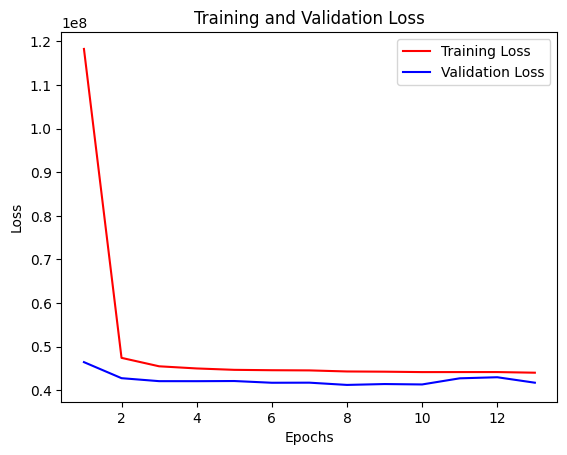

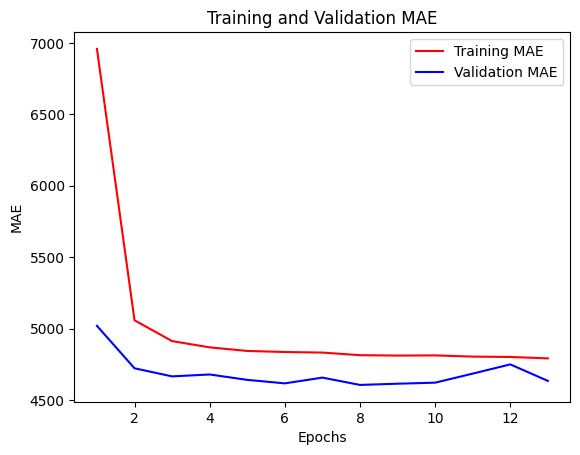

In [116]:
import matplotlib.pyplot as plt

# Sử dụng history từ quá trình huấn luyện mô hình
# (Ví dụ: history là biến lưu thông tin từ model.fit())

# Lấy thông tin từ history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

# Biểu đồ Loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Biểu đồ MAE
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load và chia dữ liệu
# (Assuming X and y are your features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# L1 Regularization (Lasso Regression)
lasso_model = Lasso(alpha=0.1)  # Thay đổi alpha tùy thuộc vào mức độ regularization cần thiết
lasso_model.fit(X_train_scaled, y_train)

lasso_cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='r2')
lasso_test_score = lasso_model.score(X_test_scaled, y_test)

# L2 Regularization (Ridge Regression)
ridge_model = Ridge(alpha=0.1)  # Thay đổi alpha tùy thuộc vào mức độ regularization cần thiết
ridge_model.fit(X_train_scaled, y_train)

ridge_cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='r2')
ridge_test_score = ridge_model.score(X_test_scaled, y_test)

# In kết quả
print(f"Lasso Regression CV Scores: {lasso_cv_scores}")
print(f"Lasso Regression Test Set Score: {lasso_test_score}")

print(f"Ridge Regression CV Scores: {ridge_cv_scores}")
print(f"Ridge Regression Test Set Score: {ridge_test_score}")

Lasso Regression CV Scores: [0.74824504 0.75200873 0.74913007 0.74347865 0.7472067 ]
Lasso Regression Test Set Score: 0.7430091012754734
Ridge Regression CV Scores: [0.74824495 0.7520089  0.74913026 0.7434783  0.74720677]
Ridge Regression Test Set Score: 0.7430089939606253


In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load và chia dữ liệu
# (Assuming X và y là các features và target variable của bạn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize mô hình Sequential với L1 và L2 regularization
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(1, activation='linear'))

# Compile mô hình
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình với Regularization và Early Stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Đánh giá hiệu suất trên tập kiểm tra
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Set Loss: {test_loss}")
print(f"Test Set MAE: {test_mae}")

Epoch 1/50
4490/4490 [==============================] - 22s 5ms/step - loss: 124904216.0000 - mae: 7145.8120 - val_loss: 48873636.0000 - val_mae: 5190.9912
Epoch 2/50
4490/4490 [==============================] - 16s 4ms/step - loss: 48786592.0000 - mae: 5164.5376 - val_loss: 43882924.0000 - val_mae: 4830.7207
Epoch 3/50
4490/4490 [==============================] - 14s 3ms/step - loss: 46155504.0000 - mae: 4962.5068 - val_loss: 42661440.0000 - val_mae: 4719.3882
Epoch 4/50
4490/4490 [==============================] - 15s 3ms/step - loss: 45215684.0000 - mae: 4887.6392 - val_loss: 42217204.0000 - val_mae: 4685.1382
Epoch 5/50
4490/4490 [==============================] - 14s 3ms/step - loss: 44939604.0000 - mae: 4862.9541 - val_loss: 41576780.0000 - val_mae: 4636.2759
Epoch 6/50
4490/4490 [==============================] - 15s 3ms/step - loss: 44671712.0000 - mae: 4842.6035 - val_loss: 41614716.0000 - val_mae: 4631.5200
Epoch 7/50
4490/4490 [==============================] - 14s 3ms/step 

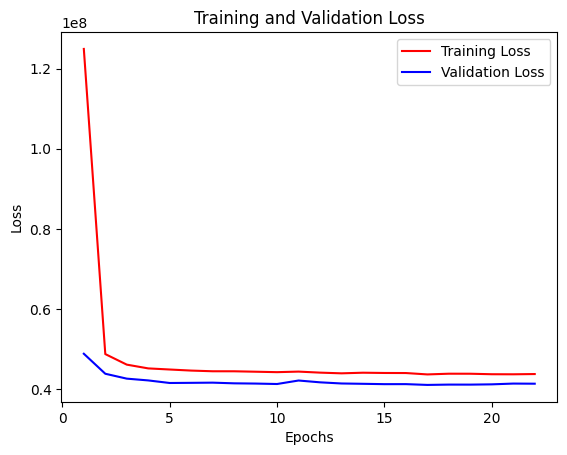

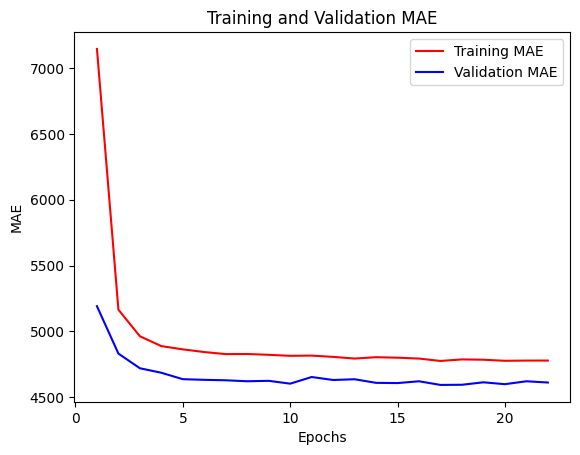

In [140]:
# Vẽ biểu đồ
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

# Biểu đồ Loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Biểu đồ MAE
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Randomized SearchCV: Phương pháp này tìm kiếm trên một không gian tham số bằng cách chọn ngẫu nhiên các giá trị từ phân phối đã định sẵn thay vì kiểm tra tất cả các giá trị trong lưới (grid) như Grid Search. Việc này giúp tiết kiệm thời gian huấn luyện bằng cách chỉ chọn một số lượng có hạn các kết hợp tham số để thử nghiệm.

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Khởi tạo mô hình RandomForestRegressor
rf = RandomForestRegressor()

# Thiết lập random search parameters
param_distributions = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Tạo RandomizedSearchCV object 
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, cv=5, scoring='r2', n_iter=5, n_jobs=-1)

# Fit RandomizedSearchCV trên dữ liệu huấn luyện
random_search.fit(X_train, y_train)

# Lấy mô hình tốt nhất từ RandomizedSearchCV
best_rf = random_search.best_estimator_

# Dự đoán trên tập kiểm tra
y_pred = best_rf.predict(X_test)


# Hiển thị best parameters và best score từ RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}
Best Score: 0.8552017118727427


In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Khởi tạo mô hình RandomForestRegressor với các siêu tham số mới sau cải tiến
rf_new = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5)

# Huấn luyện mô hình mới trên dữ liệu huấn luyện
rf_new.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra với mô hình mới
y_pred_new = rf_new.predict(X_test)

# Đánh giá mô hình mới
mse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)
mae_new = mean_absolute_error(y_test, y_pred_new)

# So sánh với kết quả của mô hình cũ
print("Evaluation on Test Set - New Model:")
print(f"Mean Squared Error: {mse_new}")
print(f"R-squared: {r2_new}")
print(f"Mean Absolute Error: {mae_new}")

# So sánh với kết quả của mô hình cũ
print("\nComparison with Previous Model:")
print(f"Mean Squared Error Improvement: {mse - mse_new}")
print(f"R-squared Improvement: {r2 - r2_new}")
print(f"Mean Absolute Error Improvement: {mae - mae_new}")

Evaluation on Test Set - New Model:
Mean Squared Error: 38938067.42787859
R-squared: 0.8529972842303979
Mean Absolute Error: 4463.917241582003

Comparison with Previous Model:
Mean Squared Error Improvement: -38133.8277252242
R-squared Improvement: 0.00014396647313530408
Mean Absolute Error Improvement: -3.622473800570333


Xử lý Ngoại lệ (Outliers):

Sử dụng Z-score: Đo lường khoảng cách của mỗi điểm dữ liệu so với trung bình và loại bỏ những điểm có Z-score vượt ngưỡng ngưỡng đã định.
Sử dụng phương pháp IQR: Sử dụng khoảng IQR (phạm vi tứ phân vị) để xác định và loại bỏ ngoại lệ dựa trên sự khác biệt giữa phần ba dữ liệu và ba phần tư dữ liệu.
Chuẩn hóa Dữ liệu (Standardization):

Sử dụng StandardScaler từ sklearn để chuẩn hóa các biến số số học về cùng một phạm vi, giúp mô hình học tập hiệu quả hơn.

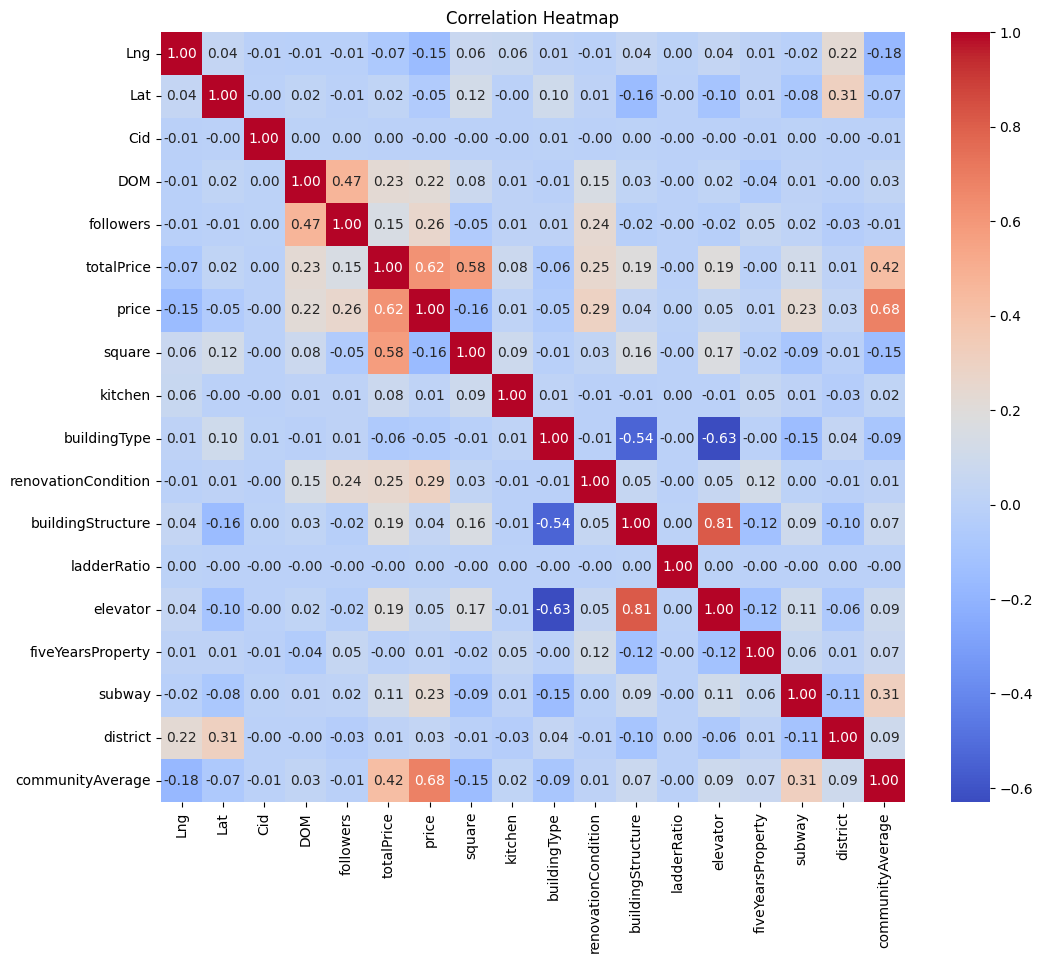

In [155]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv("D:/DOWNLOAD/new.csv", encoding='gbk', low_memory=False)

# Xử lý ngoại lệ bằng Z-score
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(stats.zscore(data[numeric_columns]))
threshold = 3
outliers = np.where(z_scores > threshold)
data_no_outliers_zscore = data.drop(data.index[outliers[0]])

# Sử dụng phương pháp IQR để loại bỏ ngoại lệ
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
data_no_outliers_iqr = data[~outliers_iqr]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_numeric_data = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)

# Tạo heatmap tương quan sau khi chuẩn hóa
correlation_matrix = scaled_numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()